In [2]:
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB


df=pd.read_csv('C:\\Machine_Learning_Assignment\\train_val_img.csv')

X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [4]:
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Λίστα τιμών για την παράμετρο var_smoothing
var_smoothing_values = np.logspace(-5, -14, num=10)  

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42) #Ορισμός του KFold validation

f1=[]
var=[]

# Ορισμός των στρατηγικών υπερδειγματοληψίας και υποδειγματοληψίας
over_sampling_strategy = {'Tram': 3500, 'Cyclist': 3500}
under_sampling_strategy = {'Car': 3500}

# Εκπαίδευση GNB για κάθε τιμή του var_smoothing
for V in var_smoothing_values:
    # Φτιάχνουμε ένα Pipeline που πρώτα κάνει scaling και μετά καλεί τον SVC
    model = ImbPipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(sampling_strategy=over_sampling_strategy, random_state=42)),
        ("under", RandomUnderSampler(sampling_strategy=under_sampling_strategy, random_state=42)),
        ("pca", PCA(n_components=300)),
        ("gnb", GaussianNB(var_smoothing=V))
    ])
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro') #Εκπαίδευση του μοντέλου για τα 5 διαφορετικά folds των train και test data
    mean_score = np.mean(scores) #Υπολογισμός των μέσων όρων του Macro f1
    var_score = np.var(scores) #Υπολογισμός της διακύμανσης
    f1.append(mean_score)
    var.append(var_score)

C:\Users\irakl\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\irakl\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [6]:
# Εκτύπωση αποτελεσμάτων
print("var_smoothing\tMean Macro F1\tVariance")
for i, V in enumerate(var_smoothing_values):
    print(f"{V}\t{f1[i]:.3f}\t\t{var[i]:.6f}")

var_smoothing	Mean Macro F1	Variance
1e-05	0.580		0.001723
1e-06	0.567		0.001074
1e-07	0.574		0.002769
1e-08	0.580		0.002424
1e-09	0.573		0.002341
1e-10	0.581		0.002957
1e-11	0.578		0.001521
1e-12	0.579		0.002538
1e-13	0.579		0.001669
1e-14	0.585		0.002460


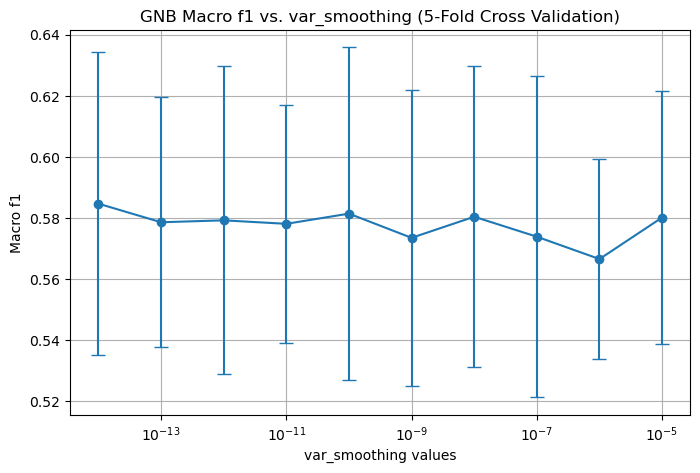

In [8]:
import matplotlib.pyplot as plt
# plot των αποτελεσμάτων για κάθε var_smoothing
plt.figure(figsize=(8, 5))
plt.errorbar(var_smoothing_values, f1, yerr=np.sqrt(var), fmt='-o', capsize=5)
plt.xscale('log') 
plt.title("GNB Macro f1 vs. var_smoothing (5-Fold Cross Validation)")
plt.xlabel("var_smoothing values")
plt.ylabel("Macro f1")
plt.grid(True)
plt.show()

In [10]:
#Εκπαίδεσυη χωρίς SMOTE και undersampling
from sklearn.pipeline import Pipeline 
f1=[]
var=[]

# Εκπαίδευση GNB για κάθε τιμή του var_smoothing
for V in var_smoothing_values:
    # Φτιάχνουμε ένα Pipeline που πρώτα κάνει scaling και μετά καλεί τον SVC
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=300)),
        ("gnb", GaussianNB(var_smoothing=V))
    ])
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro') #Εκπαίδευση του μοντέλου για τα 5 διαφορετικά folds των train και test data
    mean_score = np.mean(scores) #Υπολογισμός των μέσων όρων του Macro f1
    var_score = np.var(scores) #Υπολογισμός της διακύμανσης
    f1.append(mean_score)
    var.append(var_score)

In [31]:
# Εκτύπωση αποτελεσμάτων
print("var_smoothing\tMean Macro F1\tVariance")
for i, V in enumerate(var_smoothing_values):
    print(f"{V}\t{f1[i]:.3f}\t\t{var[i]:.6f}")

var_smoothing	Mean Macro F1	Variance
1e-05	0.881		0.000032
1e-06	0.883		0.000048
1e-07	0.881		0.000050
1e-08	0.882		0.000042
1e-09	0.884		0.000080
1e-10	0.881		0.000045
1e-11	0.883		0.000038
1e-12	0.881		0.000051
1e-13	0.883		0.000034
1e-14	0.882		0.000065


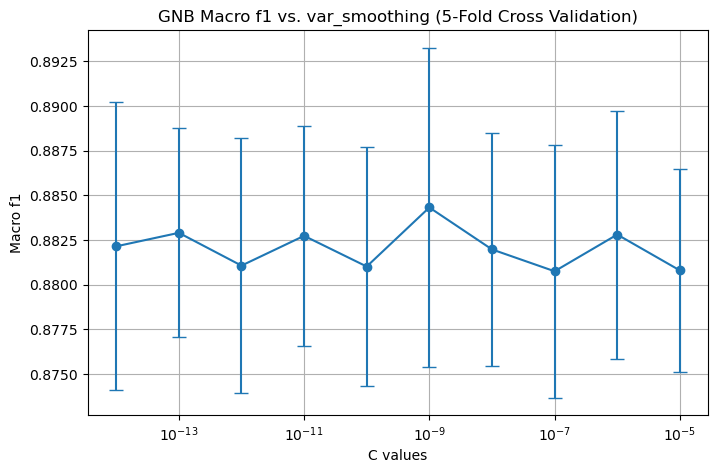

In [33]:
import matplotlib.pyplot as plt
# plot των αποτελεσμάτων για κάθε var_smoothing
plt.figure(figsize=(8, 5))
plt.errorbar(var_smoothing_values, f1, yerr=np.sqrt(var), fmt='-o', capsize=5)
plt.xscale('log') 
plt.title("GNB Macro f1 vs. var_smoothing (5-Fold Cross Validation)")
plt.xlabel("C values")
plt.ylabel("Macro f1")
plt.grid(True)
plt.show()

In [35]:
# Εκπαίδευση του τελικού μοντέλου με το καλύτερο var_smoothing σε όλο το Training+Validation σετ
from sklearn.pipeline import Pipeline

var_smoothing_val = 10**-11
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=300)),
    ("gnb", GaussianNB(var_smoothing=var_smoothing_val))
])

final_model.fit(X, y)

# Φόρτωση testing dataset
df=pd.read_csv('C:\\Machine_Learning_Assignment\\testing_img.csv')

X_test=df.iloc[:,:-1]
y_test=df.iloc[:,-1]

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
# Αξιολόγηση στο Testing σετ
y_pred = final_model.predict(X_test)
print("\nClassification Report στο Testing σετ:")
print(classification_report(y_test, y_pred))


Classification Report στο Testing σετ:
              precision    recall  f1-score   support

         Car       0.98      0.99      0.98      3890
     Cyclist       0.80      0.70      0.75       241
  Pedestrian       0.91      0.87      0.89       734
        Tram       1.00      0.79      0.88        58

    accuracy                           0.96      4923
   macro avg       0.92      0.84      0.88      4923
weighted avg       0.96      0.96      0.96      4923



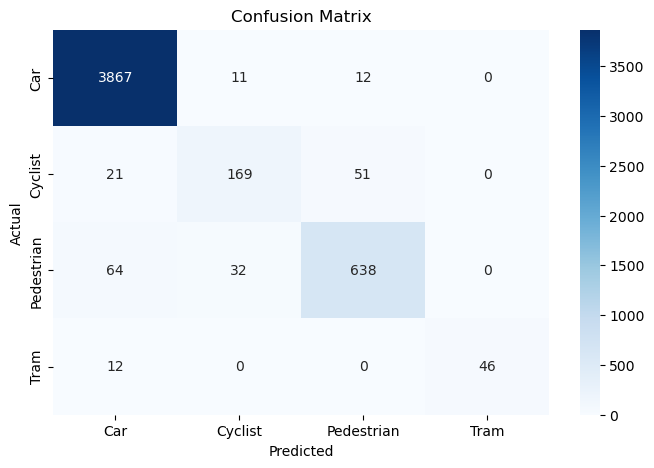

Macro F1-score στο Testing σετ: 0.8762


In [39]:
import seaborn as sns

# Δημιουργία Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)  # Λήψη των ονομάτων των κλάσεων

# Οπτικοποίηση του Confusion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Υπολογισμός Macro F1-score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1-score στο Testing σετ: {macro_f1:.4f}")

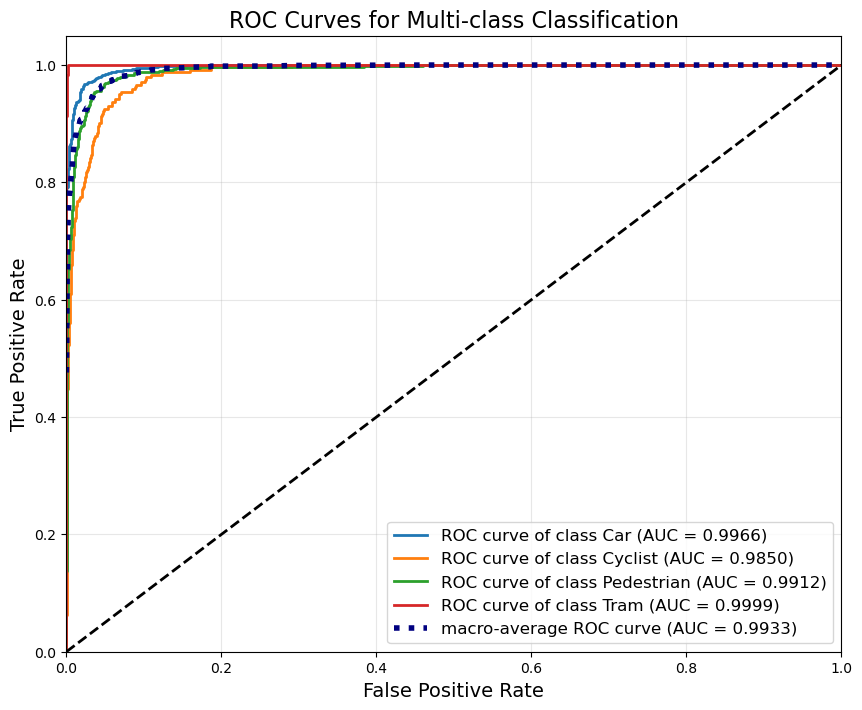

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Δημιουργία ROC Curves

# Binarize the output labels for ROC
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Λήψη των scores από το μοντέλο
y_score = final_model.predict_proba(X_test)

# Υπολογισμός ROC curve και AUC για κάθε κλάση
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Υπολογισμός Macro ROC Curve
from sklearn.preprocessing import label_binarize

# Calculate macro-average ROC curve and ROC area
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (AUC = {1:0.4f})'
             ''.format(classes[i], roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Multi-class Classification', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()